In [1]:
import yt
import yt.units as unit
import matplotlib.pyplot as plt
from yt.analysis_modules.halo_analysis.api import *

/Users/Oleg/yt-x86_64/lib/python2.7/site-packages/matplotlib-1.5.1-py2.7-macosx-10.4-x86_64.egg/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
path='/Users/Oleg/Rockstar/'   ##Put here the directory where to find the file

In [4]:
ds1=yt.GadgetDataset(path+"snapshot_100")   ##Add name of file

yt : [INFO     ] 2017-02-27 12:23:37,864 Calculating time from 1.000e+00 to be 4.250e+17 seconds
yt : [INFO     ] 2017-02-27 12:23:37,865 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2017-02-27 12:23:37,891 Parameters: current_time              = 4.2498606916e+17 s
yt : [INFO     ] 2017-02-27 12:23:37,891 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2017-02-27 12:23:37,892 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2017-02-27 12:23:37,893 Parameters: domain_right_edge         = [ 50000.  50000.  50000.]
yt : [INFO     ] 2017-02-27 12:23:37,894 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2017-02-27 12:23:37,895 Parameters: current_redshift          = 0.0
yt : [INFO     ] 2017-02-27 12:23:37,896 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2017-02-27 12:23:37,897 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2017-02-27 12:23:37,898 Parameters: hubble_constant           = 0.7


In [5]:
p1 = yt.ParticlePlot(ds1,'particle_position_x', 'particle_position_y', 'particle_mass')

yt : [INFO     ] 2017-02-27 12:23:37,909 Allocating for 2.097e+06 particles (index particle type 'all')
yt : [INFO     ] 2017-02-27 12:23:38,256 Identified 1.469e+05 octs
yt : [INFO     ] 2017-02-27 12:23:38,749 xlim = 0.000000 50000.000000
yt : [INFO     ] 2017-02-27 12:23:38,749 ylim = 0.000000 50000.000000
yt : [INFO     ] 2017-02-27 12:23:38,751 xlim = 0.000000 50000.000000
yt : [INFO     ] 2017-02-27 12:23:38,753 ylim = 0.000000 50000.000000
yt : [INFO     ] 2017-02-27 12:23:38,755 Splatting (('all', 'particle_mass')) onto a 800 by 800 mesh



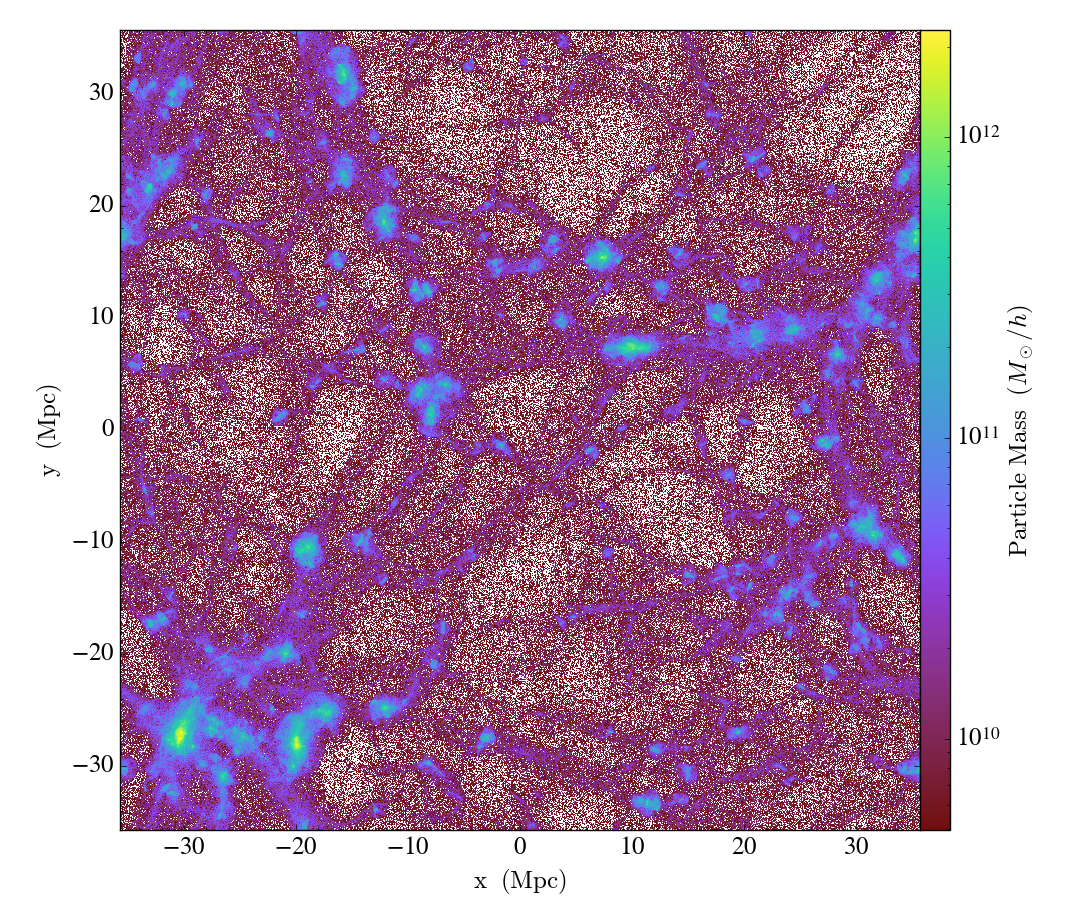

In [6]:
p1.set_axes_unit('Mpc')
p1.set_unit('particle_mass', 'Msun/h')

In [7]:
halos  = yt.load(path+'halos_0.0.bin')

yt : [INFO     ] 2017-02-27 12:23:41,343 Parameters: current_time              = 4.24986071675e+17 s
yt : [INFO     ] 2017-02-27 12:23:41,344 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2017-02-27 12:23:41,345 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2017-02-27 12:23:41,346 Parameters: domain_right_edge         = [ 50.  50.  50.]
yt : [INFO     ] 2017-02-27 12:23:41,348 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2017-02-27 12:23:41,348 Parameters: current_redshift          = 0.0
yt : [INFO     ] 2017-02-27 12:23:41,349 Parameters: omega_lambda              = 0.699999988079
yt : [INFO     ] 2017-02-27 12:23:41,350 Parameters: omega_matter              = 0.300000011921
yt : [INFO     ] 2017-02-27 12:23:41,351 Parameters: hubble_constant           = 0.699999988079


In [8]:
hc = HaloCatalog(halos_ds = halos)
hc.load()

yt : [INFO     ] 2017-02-27 12:23:41,358 Allocating for 3.102e+03 particles (index particle type 'all')
yt : [INFO     ] 2017-02-27 12:23:41,367 Identified 1.433e+03 octs


yt : [INFO     ] 2017-02-27 12:23:43,139 xlim = 0.000000 50000.000000
yt : [INFO     ] 2017-02-27 12:23:43,147 ylim = 0.000000 50000.000000
yt : [INFO     ] 2017-02-27 12:23:43,158 xlim = 0.000000 50000.000000
yt : [INFO     ] 2017-02-27 12:23:43,161 ylim = 0.000000 50000.000000
yt : [INFO     ] 2017-02-27 12:23:43,165 Splatting (('all', 'particle_mass')) onto a 800 by 800 mesh



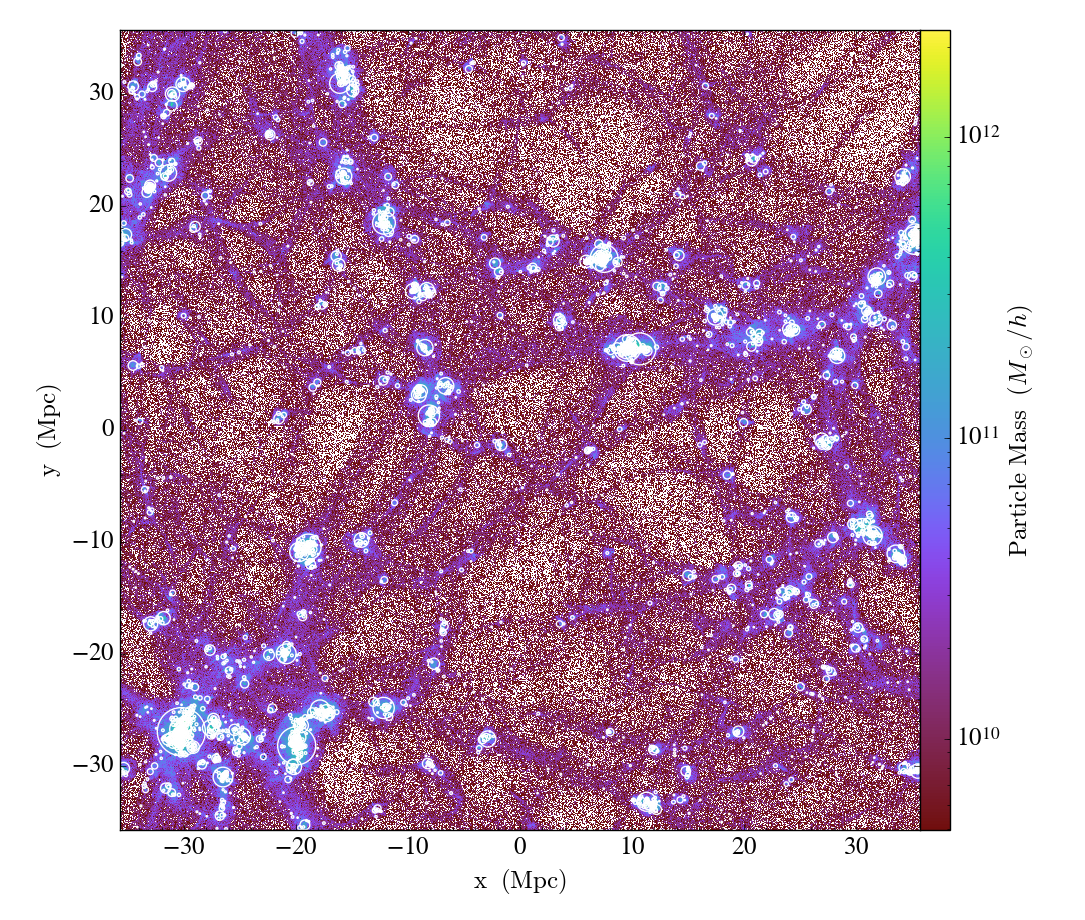

In [9]:
p = yt.ParticlePlot(ds1,'particle_position_x', 'particle_position_y', 'particle_mass')
p.annotate_halos(hc)
p.set_axes_unit('Mpc')
p.set_unit('particle_mass', 'Msun/h')

In [10]:
import tempfile
import shutil
import os

tmpdir = tempfile.mkdtemp()

In [11]:
hc2 = HaloCatalog(data_ds = ds1, halos_ds= halos, 
                  output_dir = os.path.join(tmpdir,'halo_catalog'))

In [12]:
hc2.add_filter("quantity_value","particle_mass",">",1e13,"Msun/h")

In [13]:
hc2.create()

yt : [INFO     ] 2017-02-27 12:23:48,248 Saving halo catalog (49 halos) to /var/folders/c8/vqw4f0692sq917vygxcr3gzc0000gn/T/tmpzj26lN/halo_catalog/halo_catalog.
yt : [INFO     ] 2017-02-27 12:23:48,249 Saving field data to yt dataset: /var/folders/c8/vqw4f0692sq917vygxcr3gzc0000gn/T/tmpzj26lN/halo_catalog/halo_catalog.0.h5.


In [14]:
halos_ds1 = yt.load(os.path.join(tmpdir,'halo_catalog/halo_catalog.0.h5'))

hc_r = HaloCatalog(halos_ds=halos_ds1, 
                  output_dir=os.path.join(tmpdir,'halo_catalog'))
hc_r.load()

yt : [INFO     ] 2017-02-27 12:23:48,314 Parameters: current_time              = 4.24986071675e+17
yt : [INFO     ] 2017-02-27 12:23:48,315 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2017-02-27 12:23:48,316 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2017-02-27 12:23:48,317 Parameters: domain_right_edge         = [  2.20405545e+26   2.20405545e+26   2.20405545e+26]
yt : [INFO     ] 2017-02-27 12:23:48,318 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2017-02-27 12:23:48,319 Parameters: current_redshift          = 0.0
yt : [INFO     ] 2017-02-27 12:23:48,319 Parameters: omega_lambda              = 0.699999988079
yt : [INFO     ] 2017-02-27 12:23:48,320 Parameters: omega_matter              = 0.300000011921
yt : [INFO     ] 2017-02-27 12:23:48,321 Parameters: hubble_constant           = 0.699999988079
yt : [INFO     ] 2017-02-27 12:23:48,327 Allocating for 4.900e+01 particles (index particle type 'all')
yt : [INFO     ] 2017-0

yt : [INFO     ] 2017-02-27 12:23:48,639 xlim = 0.000000 50000.000000
yt : [INFO     ] 2017-02-27 12:23:48,640 ylim = 0.000000 50000.000000
yt : [INFO     ] 2017-02-27 12:23:48,642 xlim = 0.000000 50000.000000
yt : [INFO     ] 2017-02-27 12:23:48,643 ylim = 0.000000 50000.000000
yt : [INFO     ] 2017-02-27 12:23:48,644 Splatting (('all', 'particle_mass')) onto a 800 by 800 mesh



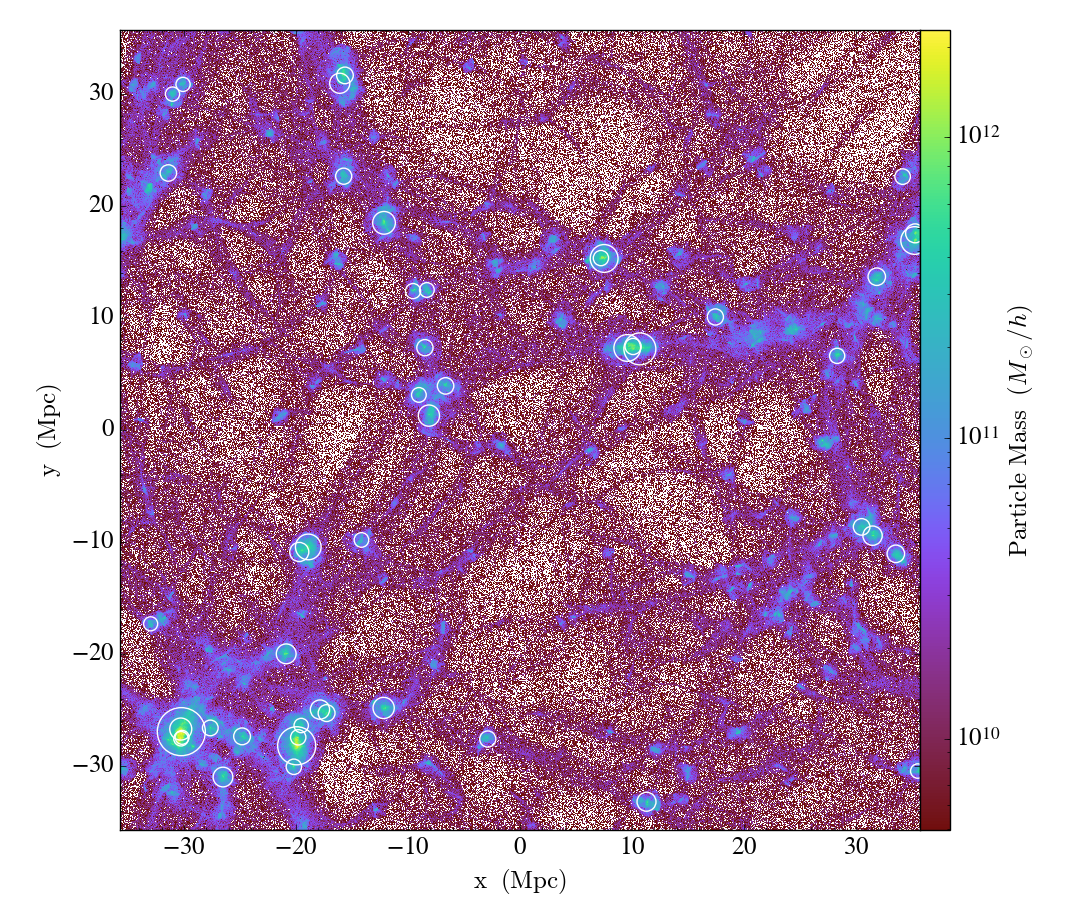

In [15]:
p = yt.ParticlePlot(ds1,'particle_position_x', 'particle_position_y', 'particle_mass')
p.annotate_halos(hc_r)
p.set_axes_unit('Mpc')
p.set_unit('particle_mass', 'Msun/h')